<h1>Ridge Regression Implementation</h1>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
X,Y = make_regression(n_samples=100 , n_features=1 , n_informative=1 , n_targets=1 , noise=20 , random_state=12)

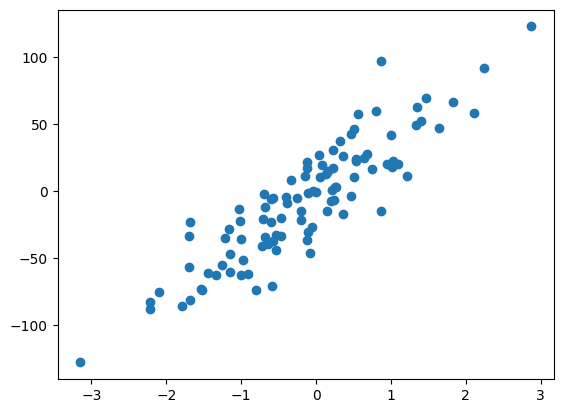

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [6]:
reg.coef_, reg.intercept_

(array([38.47185549]), np.float64(-1.5451093359356598))

In [7]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=10)
r.fit(X,Y)

Ridge(alpha=10)

In [8]:
r.coef_ , r.intercept_

(array([35.24979058]), np.float64(-2.0100774605043217))

In [9]:
r1 = Ridge(alpha=100)
r1.fit(X,Y)
r1.coef_ , r1.intercept_

(array([20.09954071]), np.float64(-4.196372107781507))

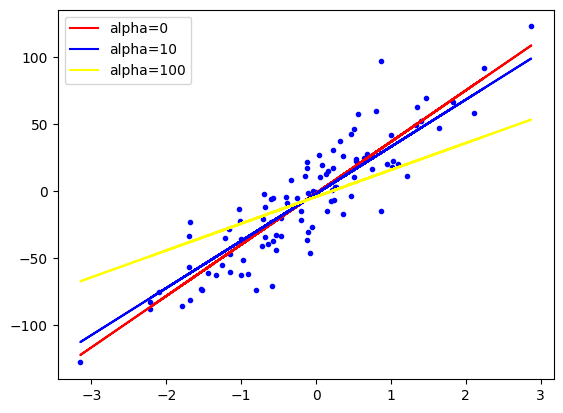

In [11]:
plt.plot(X,Y,'b.')
plt.plot(X , reg.predict(X) , color='red' , label='alpha=0')
plt.plot(X , r.predict(X) , color='blue' , label='alpha=10')
plt.plot(X , r1.predict(X) , color='yellow' , label='alpha=100')
plt.legend()
plt.show()


In [17]:
class meraRidge:
    def __init__(self , alpha=0.1):
        self.alpha=alpha
        self.m = None
        self.b = None
    
    def fit(self , X_train , Y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + ( Y_train[i] - Y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

            self.m = num/(den + self.alpha)
            self.b = Y_train.mean() - self.m * X_train.mean()

        print(self.m , self.b)

    def predict(self , X_test):
        pass

In [18]:
rig = meraRidge(alpha=10)
rig.fit(X,Y)

[35.24979058] [-2.01007746]


In [19]:
rig2 = meraRidge(alpha=100)
rig2.fit(X,Y)

[20.09954071] [-4.19637211]


<h1>For n dimension : </h1>
<p>Beta = (X^T X + (alpha)I )^-1 X^T Y</p>

In [20]:
from sklearn.datasets import load_diabetes
X,Y = load_diabetes(return_X_y=True)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=13)

In [29]:
ridge = Ridge(alpha=0.1 , solver='cholesky')
ridge.fit(X_train,Y_train)


Ridge(alpha=0.1, solver='cholesky')

In [30]:
ridge.coef_ , ridge.intercept_

(array([  -5.10373917, -211.97523484,  532.48566195,  297.38876175,
         -57.55670284,  -95.16345048, -206.58948886,  105.25789549,
         437.89687435,  124.41404427]),
 np.float64(150.3250826583213))

In [31]:
from sklearn.metrics import r2_score
Y_pred = ridge.predict(X_test)
r2_score(Y_test , Y_pred)

0.37915546090987373

In [38]:
class MeraRidge:
    def __init__(self  , alpha=0.1):
        self.coef_ = None
        self.intercept_ = None
        self.alpha=alpha

    def fit(self , X_train , Y_train):
        X_train =  np.insert(X_train , 0 , 1, axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        #calculate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T , X_train) + self.alpha*I).dot(X_train.T).dot(Y_train)
        self.intercept_ = betas[0];
        self.coef_ = betas[1:]
        
        print(betas)
    def predict(self , X_test):
        return np.dot( X_test , self.coef_ ) + self.intercept_

In [39]:
rg = MeraRidge()

In [40]:
rg.fit(X_train , Y_train)

[ 150.32508266   -5.10373917 -211.97523484  532.48566195  297.38876175
  -57.55670284  -95.16345048 -206.58948886  105.25789549  437.89687435
  124.41404427]


In [41]:
Y_pred = rg.predict(X_test)
r2_score(Y_test , Y_pred)

0.3791554609098744